In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
# Checking the number of mice.
number_of_mice = len(combined_data.groupby("Mouse ID").count())
number_of_mice

249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint. Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [22]:
# Get all the data for the duplicate mouse ID. 
duplicate_mice_id = combined_data[combined_data["Mouse ID"] == "g989"]
duplicate_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice in the clean DataFrame.
new_number_of_mice = len(clean_data["Mouse ID"].unique())
new_number_of_mice

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen.

mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
standard_error = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev": standard_deviation,
    "Tumor Volume Std. Err": standard_error})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg_method = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg_method

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

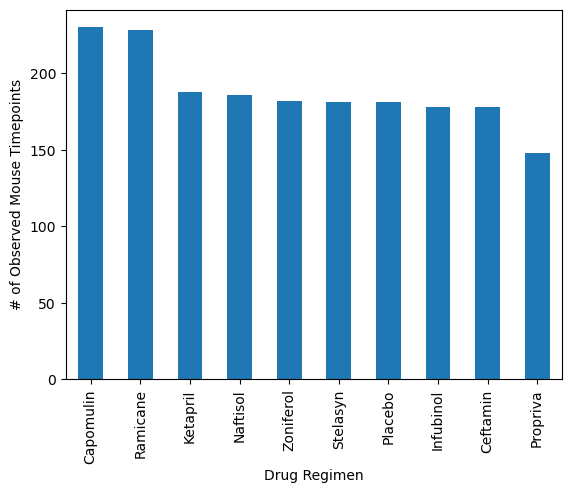

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_data["Drug Regimen"].value_counts()
drug_regimen.plot(kind='bar')  

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()       


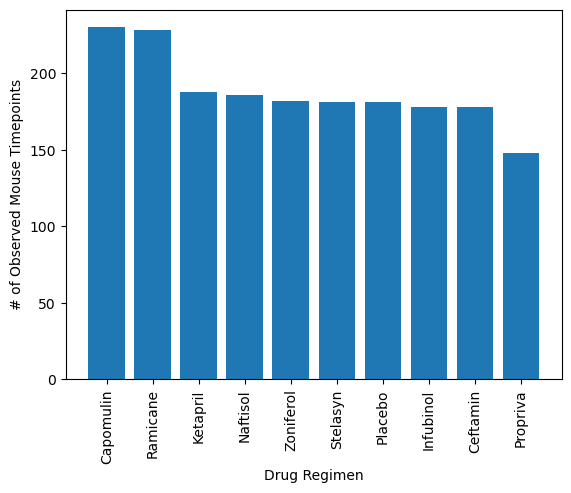

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_regimen.index
y_axis = drug_regimen

plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

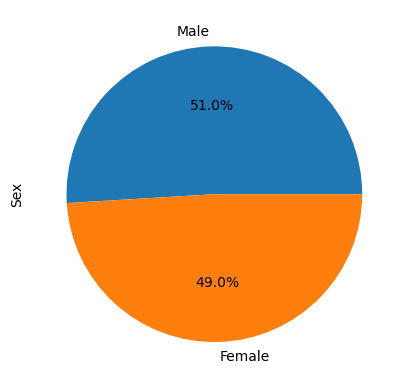

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_data["Sex"].value_counts()

mice_sex.plot.pie(autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()   


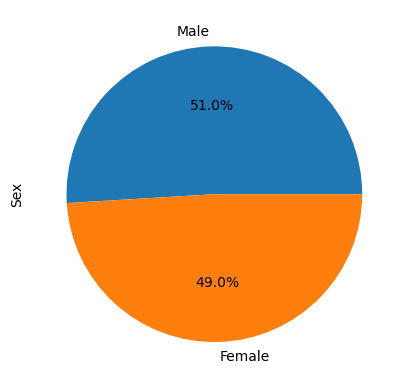

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot  
mice_sex = clean_data["Sex"].value_counts()

plt.pie(mice_sex, labels=mice_sex.index, autopct="%1.1f%%")
plt.ylabel("Sex") 
plt.show()



## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how="left")

# Filter for specific treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_data[merged_data['Drug Regimen'].isin(selected_regimens)]
filtered_data.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
10,a520,45,38.810366,1,Ramicane,Male,13,21
11,a577,30,57.031862,2,Infubinol,Female,6,25
12,a644,45,32.978522,1,Ramicane,Female,7,17
13,a685,45,66.083066,3,Infubinol,Male,8,30
19,b128,45,38.982878,2,Capomulin,Female,9,22


In [32]:
# Put treatments into a list for a for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

for treatment in selected_regimens:

 # Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = clean_data.loc[clean_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to tumor vol data
    tumor_volume_data.append(tumor_volume)
    
    # Calculate the IQR 
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    print(f"The outliers for {treatment}: {outliers}")



The outliers for Capomulin: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
The outliers for Ramicane: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
The outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
The outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

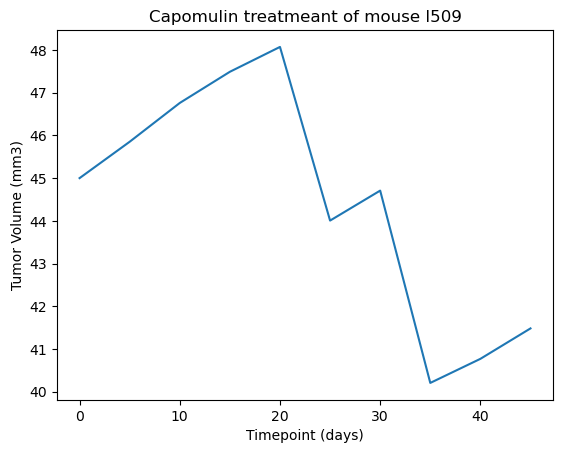

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
line_plot = capomulin_mouse.loc[capomulin_mouse["Mouse ID"] == "l509",:]

x_axis = line_plot["Timepoint"]
y_axis = line_plot["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_capomulin_vol =capomulin_mouse.groupby(['Mouse ID']).mean()

plt.scatter(avg_capomulin_vol['Weight (g)'],avg_capomulin_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


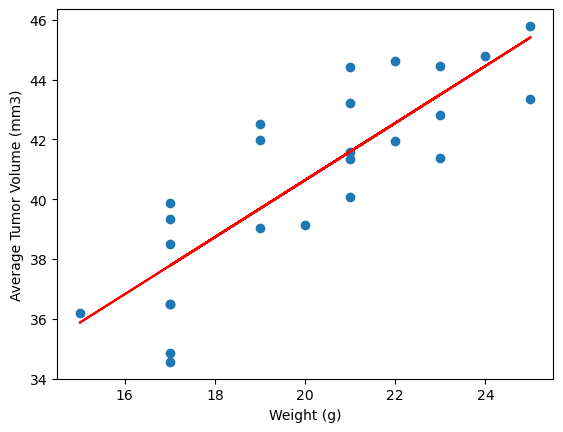

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
